# Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
## Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  



In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import externals
from io import StringIO
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 

In [3]:
#import dataset
df=pd.read_csv("D:\\Company_Data.csv")
df1=df.copy()
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [5]:
df1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [10]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

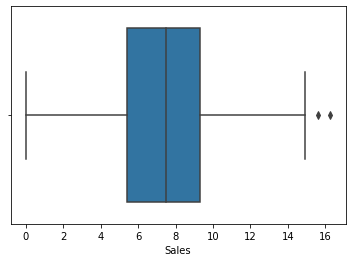

In [12]:
#Outlier Check
import warnings
warnings.filterwarnings('ignore')
ax = sns.boxplot(df1['Sales'])

In [13]:
#The data has 2 outlier instances

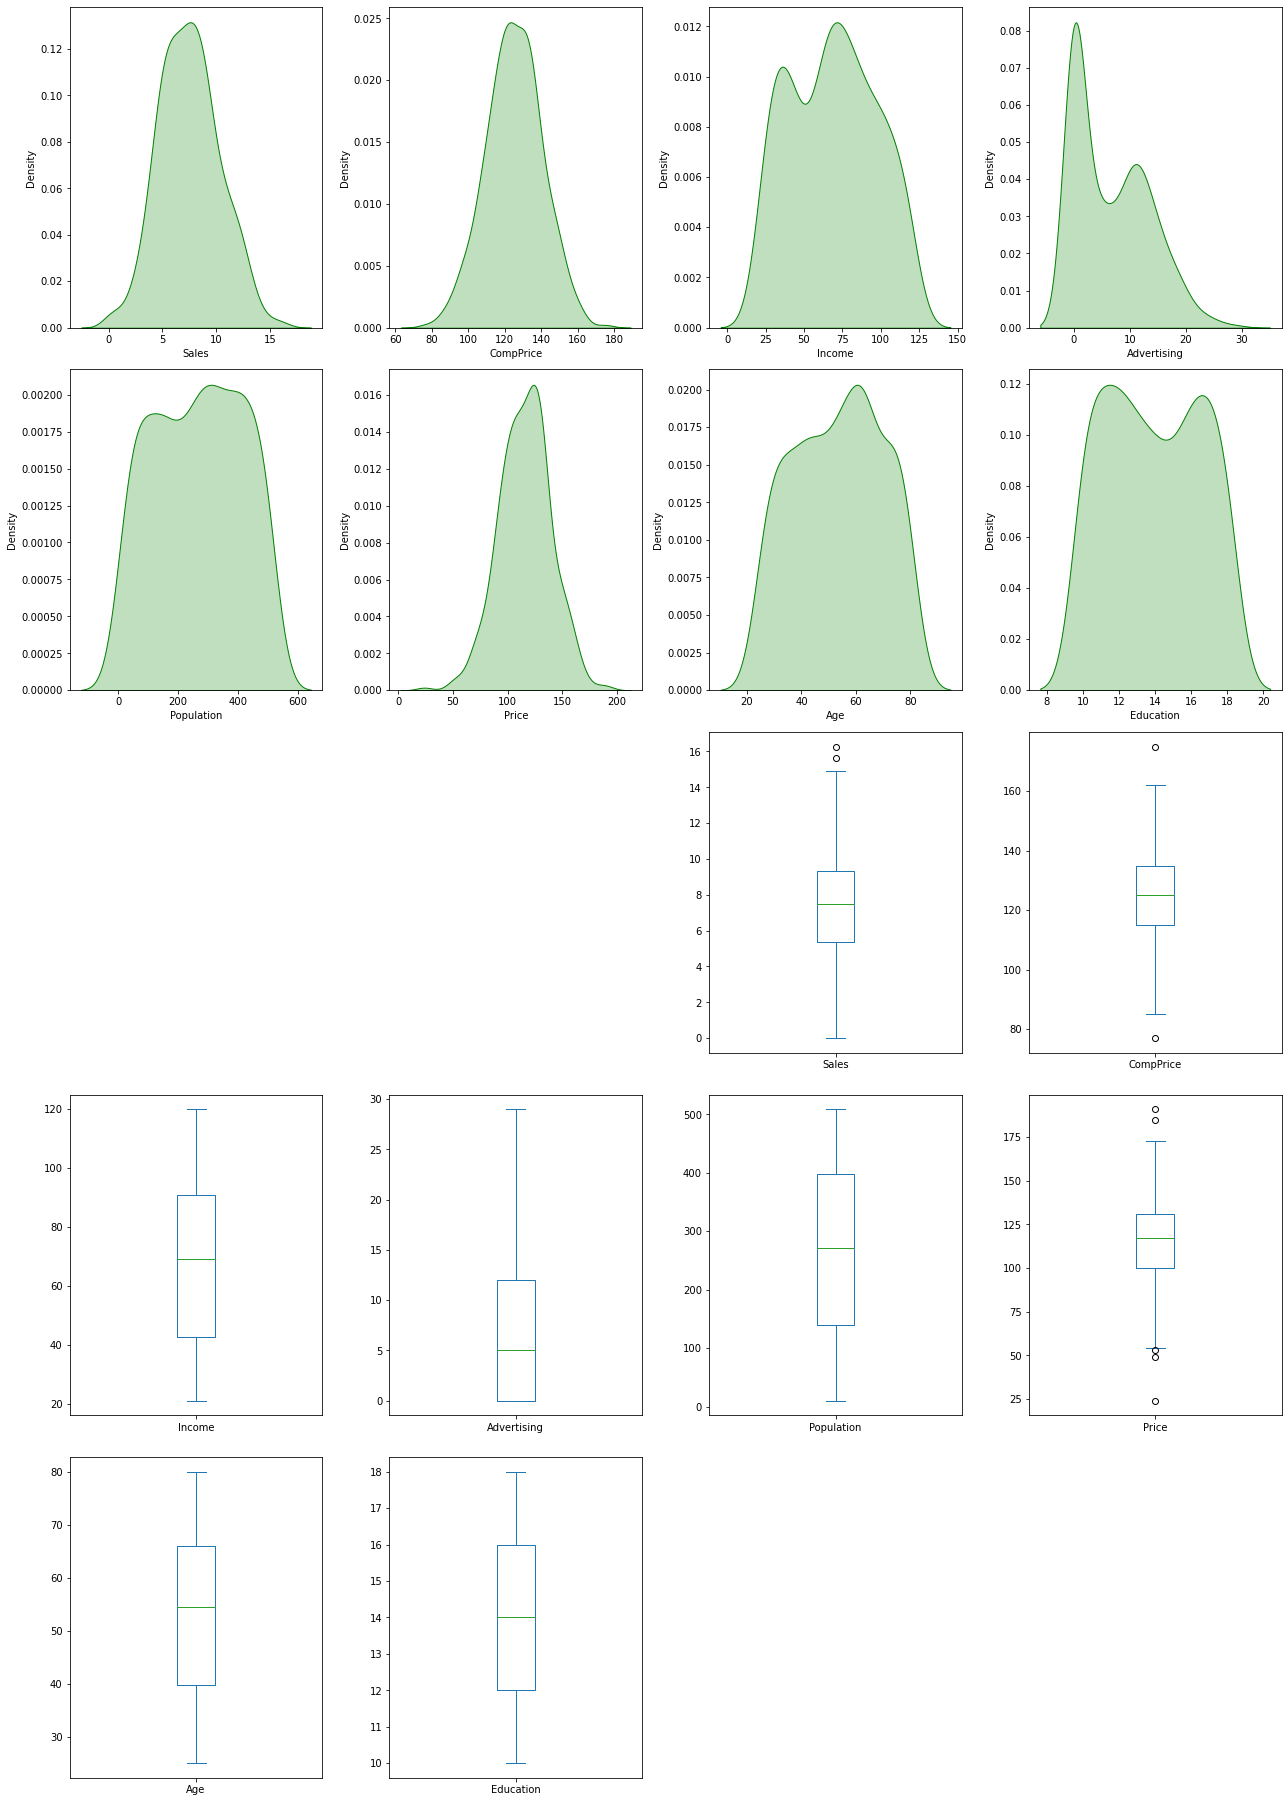

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [14]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [15]:
corr=df1.corr()

In [16]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [18]:
corr = df1.corr()

<AxesSubplot:>

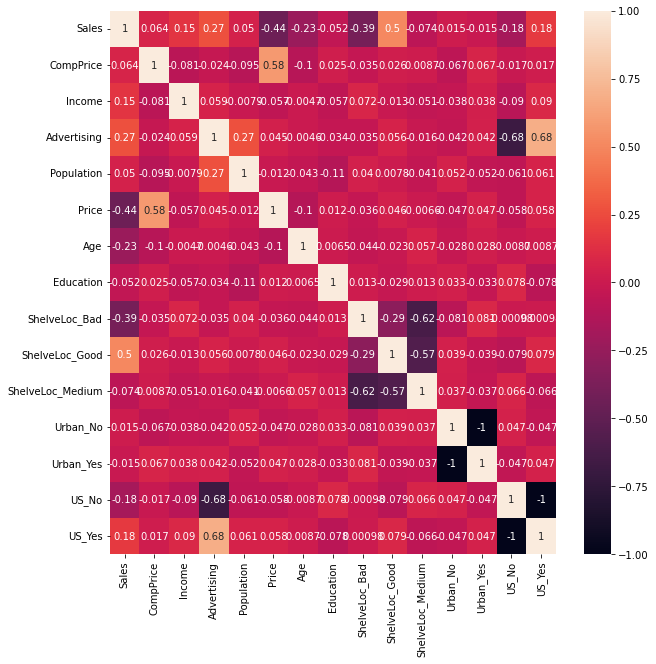

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

###  Random Forest Model
Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [20]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [21]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [23]:
y_train.value_counts()

small    168
large    152
Name: sales, dtype: int64

In [24]:
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.79375

In [25]:
pred_train = model.predict(x_train)

In [26]:
accuracy_score(y_train,pred_train)

1.0

In [27]:
confusion_matrix(y_train,pred_train)

array([[152,   0],
       [  0, 168]], dtype=int64)

In [28]:
pred_test=model.predict(x_test)

In [29]:
accuracy_score(y_test,pred_test)

0.8125

In [30]:
confusion_matrix(y_test,pred_test)

array([[36, 11],
       [ 4, 29]], dtype=int64)

In [31]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df_t

,Actual,Predicted
357,large,large
130,large,large
237,large,small
286,large,large
55,small,small
...,...,...
300,large,small
32,small,large
115,large,small
10,large,large


In [32]:
cols = list(df1.columns)

In [33]:
predictors=cols[0:14]
target=cols[14]

In [34]:
tree1=model.estimators_[20]

In [35]:
dot_data=StringIO()

In [37]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True)

### Conclusion
Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 76%
As seen in the confusion matrix of Test data 61 instances are presdected correctly and 19 instances are not

In [43]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [44]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [45]:
tree_small=rf_small.estimators_[5]

In [47]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [49]:
model.feature_importances_

array([0.11854412, 0.09963672, 0.09048761, 0.08848349, 0.23810837,
       0.1238112 , 0.06074922, 0.03873281, 0.07020229, 0.02250044,
       0.0124743 , 0.01196307, 0.01317774, 0.01112862])

In [50]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [51]:
fi

,feature,importance
4,Price,0.238108
5,Age,0.123811
0,CompPrice,0.118544
1,Income,0.099637
2,Advertising,0.090488
3,Population,0.088483
8,ShelveLoc_Good,0.070202
6,Education,0.060749
7,ShelveLoc_Bad,0.038733
9,ShelveLoc_Medium,0.022500


In [52]:
#As seen in the above table Price is most important feature

## Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [54]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=83cd83d2a4eeccf9a7097aafa4abb34bd64093a7fb2dc0097a4ff012adaa83aa
  Stored in directory: c:\users\vikrant\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz 
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

In [56]:
#import dataset

In [58]:
df2=pd.read_csv("D:\\Fraud_check.csv")

In [59]:
df3=df2.copy()
df3

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [60]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [61]:
df3.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [63]:
df3.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

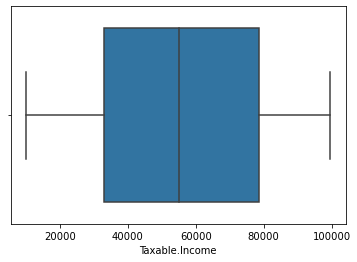

In [64]:
#Outlier Check
ax = sns.boxplot(df3['Taxable.Income'])

In [65]:
#There are no outliers in the data

In [68]:
num_columns = df3.select_dtypes(exclude='object').columns.tolist()

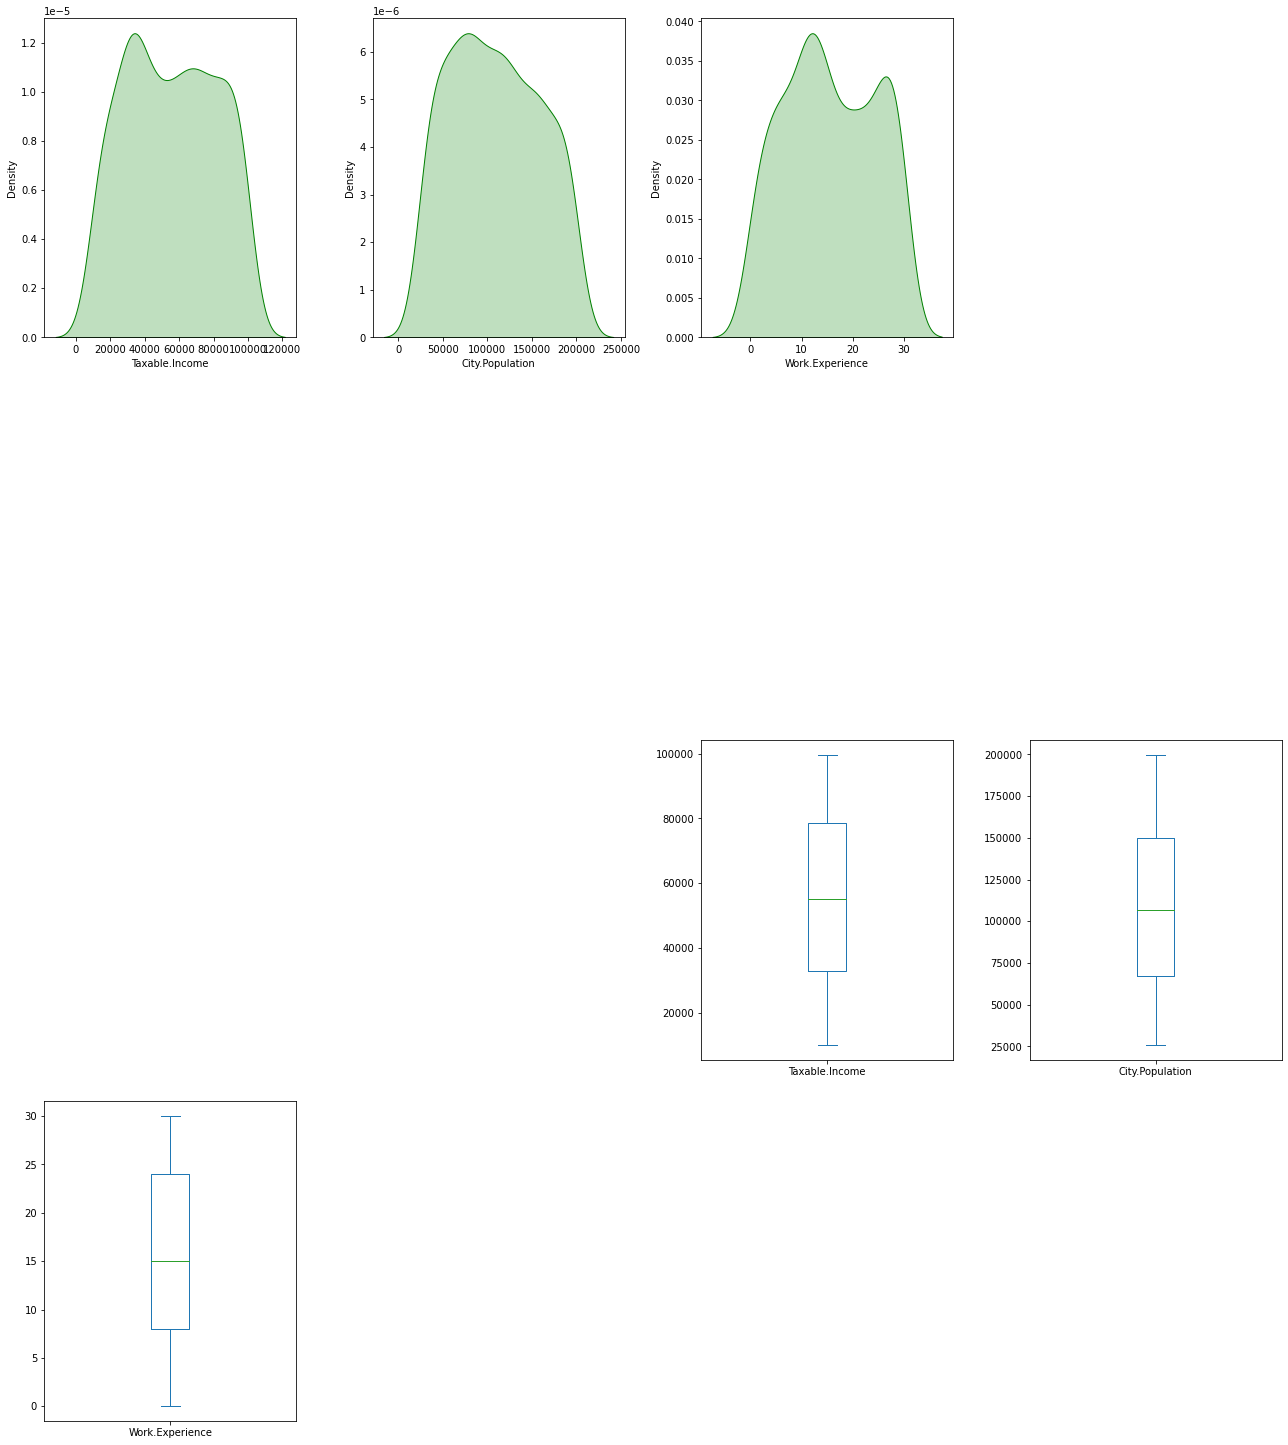

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [69]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df2[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df2[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df2[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [71]:
df3 = pd.get_dummies(df3, columns = ['Undergrad','Marital.Status','Urban'])

In [72]:
corr=df3.corr()

<AxesSubplot:>

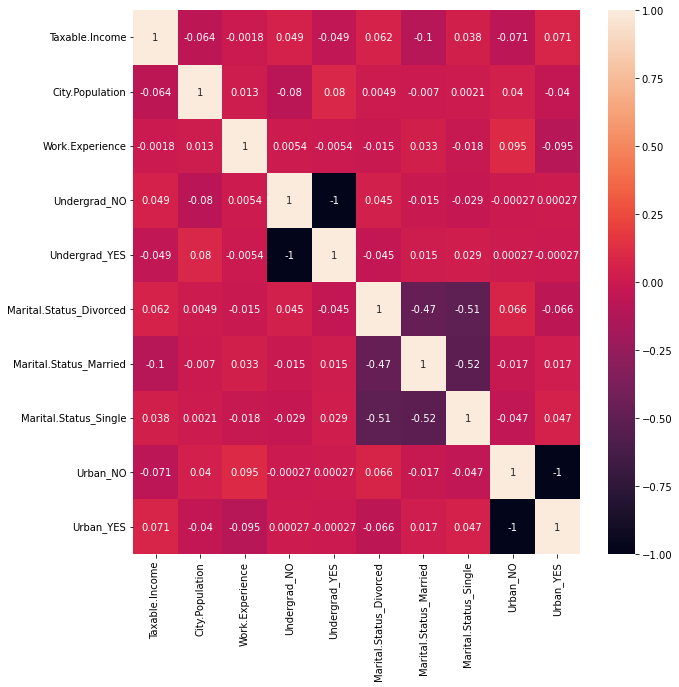

In [73]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

### Random Forest Model
Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [74]:
df3['Taxable.Income']=pd.cut(df3['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [75]:
list(df3.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [76]:
X = df3.iloc[:,1:10]
y = df3.iloc[:,0]

In [77]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [78]:
y_train.value_counts()

good     389
risky     91
Name: Taxable.Income, dtype: int64

In [80]:
model1 =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model1.fit(x_train,y_train)
model1.oob_score_

0.7666666666666667

In [81]:
pred_train1=model1.predict(x_train)

In [82]:
accuracy_score(y_train,pred_train1)

1.0

In [83]:
confusion_matrix(y_train,pred_train1)

array([[389,   0],
       [  0,  91]], dtype=int64)

In [84]:
pred_test1 = model1.predict(x_test)

In [90]:
confusion_matrix(y_test,pred_test1)

array([[86,  1],
       [32,  1]], dtype=int64)

In [94]:
df_t1=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test1})

In [95]:
df_t1

,Actual,Predicted
31,good,good
578,good,good
259,risky,good
520,good,good
519,good,good
...,...,...
370,good,good
223,good,good
172,risky,good
530,good,good


In [96]:
cols = list(df1.columns)

In [97]:
predictors = cols[1:10]
target = cols[0]

In [98]:
tree2 = model.estimators_[20]

In [99]:
dot_data = StringIO()

In [101]:
export_graphviz(tree2, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision=3)

In [102]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

### Conclusion
Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 72%
As seen in the confusion matrix of Test data 94 instances are presdected correctly and 26 instances are not

In [104]:
rf_small1 = RF(n_estimators=10, max_depth = 3)

In [105]:
rf_small1.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [106]:
tree_small1 = rf_small1.estimators_[5]

In [108]:
export_graphviz(tree_small1, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [109]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [116]:
model1.feature_importances_

array([0.52185293, 0.34972489, 0.0173046 , 0.01441536, 0.02098644,
       0.02159582, 0.02065689, 0.01794795, 0.01551513])

In [117]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model1.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [118]:
fi

,feature,importance
0,City.Population,0.521853
1,Work.Experience,0.349725
5,Marital.Status_Married,0.021596
4,Marital.Status_Divorced,0.020986
6,Marital.Status_Single,0.020657
7,Urban_NO,0.017948
2,Undergrad_NO,0.017305
8,Urban_YES,0.015515
3,Undergrad_YES,0.014415


In [ ]:
#As seen in the above table city population is most important feature